<a href="https://colab.research.google.com/github/ozvnnn/MNIST_fastai/blob/main/MNIST_digit_classifier_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I am going to make digit classifier with explanations. In this part, we'll create learner and export it. And, in part 2, we make predictions. First cell includes command for upgrade fastai on colab and import the necessary parts.




In [ ]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! pip install fastbook
from fastai.vision.all import * 
from fastbook import * 
import ipywidgets as widgets

First thing we should have done must be downloading necessary data and creating datablock. First cell downloads and extracts data to 'path'. In dataset, we have a different directory for testing and tranining sets and also for every digit.We can take a look what's inside of data with "(path).ls()"


In [2]:
path = untar_data(URLs.MNIST)

To show training and testing:


In [3]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

To show digit files:


In [4]:
(path/"training").ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/4')]

Now, we'll create our datablock.


In [5]:
digit_block = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=2),
        get_y=parent_label,
        batch_tfms=aug_transforms(mult=2., do_flip=False)) ##do_flip = False is important here because flipping the digits may gives us unwanted results since digit are meanless when they are flipped.

Last cell created our datablock not dataset or dataloader since we didn't give it our data. Let's give our data and make a little observation.

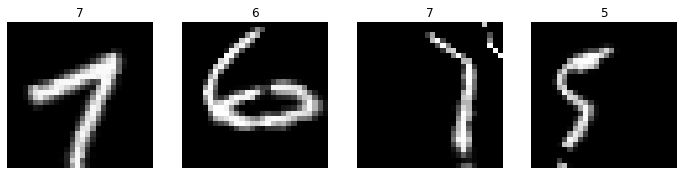

In [6]:
dls = digit_block.dataloaders(path/"training")
dls.train.show_batch(max_n=4, nrows=1)

Picture shown above can be look weird since we apply augmentations on them. Next step is creating a learner. 

In [7]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

cnn_learner builds a convolutional neural network learner from dataloaders. In our case we use ResNet architecture with 34 layers. Then, we will make a check for optimal learning rate.


SuggestedLRs(valley=0.0014454397605732083)

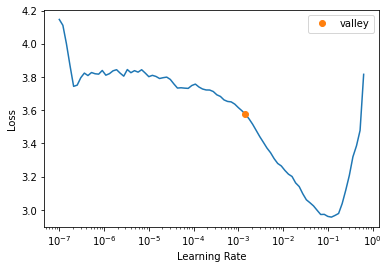

In [8]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,1.233510,0.713048,0.769250,01:58


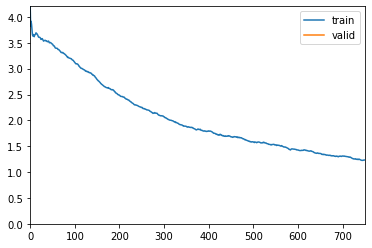

epoch,train_loss,valid_loss,accuracy,time
0,0.471720,0.203093,0.933750,02:08
1,0.271164,0.111953,0.963500,02:07
2,0.175693,0.066175,0.979083,02:07
3,0.154894,0.047589,0.985250,02:07
4,0.133842,0.041241,0.987583,02:07
5,0.092512,0.039037,0.987000,02:07
6,0.086166,0.031547,0.989833,02:07
7,0.069900,0.029535,0.990833,02:08
8,0.057457,0.025965,0.991833,02:08
9,0.061980,0.022729,0.992833,02:08


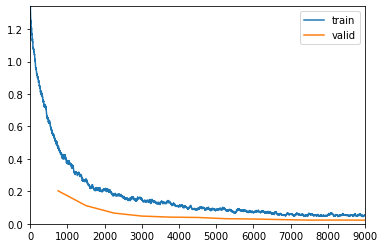

In [9]:
learn.fine_tune(12, base_lr=0.0012022644514217973, cbs=[ShowGraphCallback()])

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

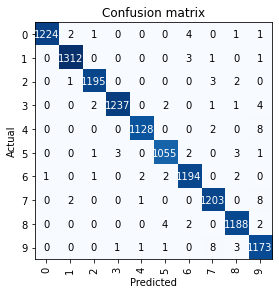

In [11]:
interp.plot_confusion_matrix()

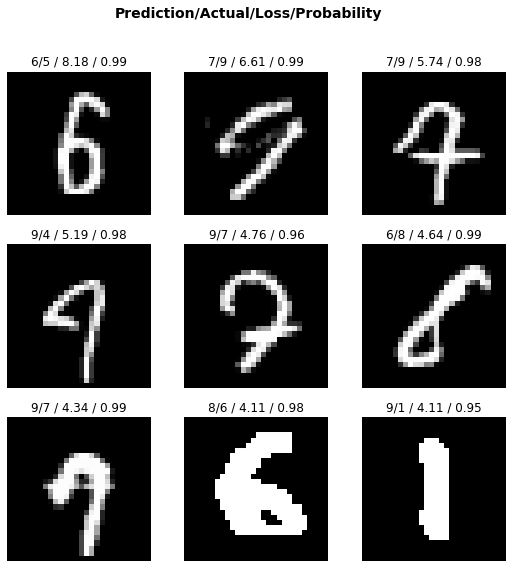

In [12]:
interp.plot_top_losses(10)


In [13]:
learn.export("models/MNIST-99acc.pkl")